<a href="https://colab.research.google.com/github/Yash-Kedar/Demo-project/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Block 1: Imports & Dataset Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


Block 2: Load & Preprocess MNIST

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images (28x28 → 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
def one_hot(y, num_classes=10):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Block 3: Activation Functions

In [3]:
def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)


Block 4: Loss & Accuracy

In [4]:
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))


Block 5: Initialize Weights

In [9]:
np.random.seed(42)

input_size = 784
hidden_size = 256
output_size = 10

W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))


Block 6: Forward Propagation

In [10]:
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    return A1, A2


Block 7: Training Loop (Gradient Descent)

In [11]:
batch_size = 128
lr = 0.01
epochs = 50

losses = []
accuracies = []

for epoch in range(epochs):
    perm = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[perm]
    y_shuffled = y_train_oh[perm]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        A1, y_pred = forward(X_batch)

        # Backprop
        dZ2 = y_pred - y_batch
        dW2 = np.dot(A1.T, dZ2) / X_batch.shape[0]
        db2 = np.mean(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * (A1 > 0)
        dW1 = np.dot(X_batch.T, dZ1) / X_batch.shape[0]
        db1 = np.mean(dZ1, axis=0, keepdims=True)

        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    # Epoch evaluation
    _, train_pred = forward(X_train)
    loss = cross_entropy_loss(y_train_oh, train_pred)
    acc = accuracy(y_train_oh, train_pred)

    losses.append(loss)
    accuracies.append(acc)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Acc: {acc:.4f}")


Epoch 1/50 | Loss: 0.6302 | Acc: 0.8515
Epoch 2/50 | Loss: 0.4602 | Acc: 0.8804
Epoch 3/50 | Loss: 0.3974 | Acc: 0.8929
Epoch 4/50 | Loss: 0.3629 | Acc: 0.9003
Epoch 5/50 | Loss: 0.3396 | Acc: 0.9058
Epoch 6/50 | Loss: 0.3212 | Acc: 0.9104
Epoch 7/50 | Loss: 0.3071 | Acc: 0.9144
Epoch 8/50 | Loss: 0.2953 | Acc: 0.9168
Epoch 9/50 | Loss: 0.2850 | Acc: 0.9206
Epoch 10/50 | Loss: 0.2758 | Acc: 0.9236
Epoch 11/50 | Loss: 0.2677 | Acc: 0.9251
Epoch 12/50 | Loss: 0.2599 | Acc: 0.9278
Epoch 13/50 | Loss: 0.2528 | Acc: 0.9297
Epoch 14/50 | Loss: 0.2460 | Acc: 0.9319
Epoch 15/50 | Loss: 0.2399 | Acc: 0.9337
Epoch 16/50 | Loss: 0.2335 | Acc: 0.9354
Epoch 17/50 | Loss: 0.2283 | Acc: 0.9374
Epoch 18/50 | Loss: 0.2226 | Acc: 0.9388
Epoch 19/50 | Loss: 0.2176 | Acc: 0.9402
Epoch 20/50 | Loss: 0.2128 | Acc: 0.9416
Epoch 21/50 | Loss: 0.2084 | Acc: 0.9427
Epoch 22/50 | Loss: 0.2039 | Acc: 0.9442
Epoch 23/50 | Loss: 0.2000 | Acc: 0.9452
Epoch 24/50 | Loss: 0.1954 | Acc: 0.9466
Epoch 25/50 | Loss: 0.191

Block 8: Test Accuracy

In [12]:
_, test_pred = forward(X_test)
test_acc = accuracy(y_test_oh, test_pred)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9606


Block 9: Visualization

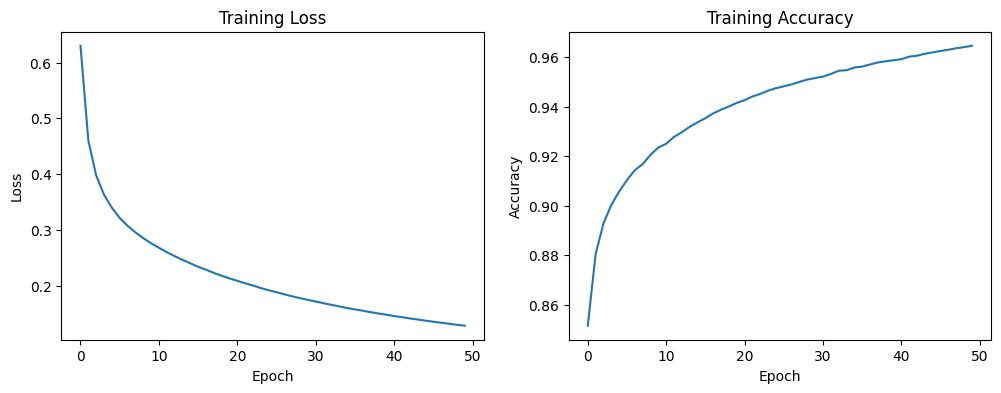

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()


Block 10: Visualize Predictions

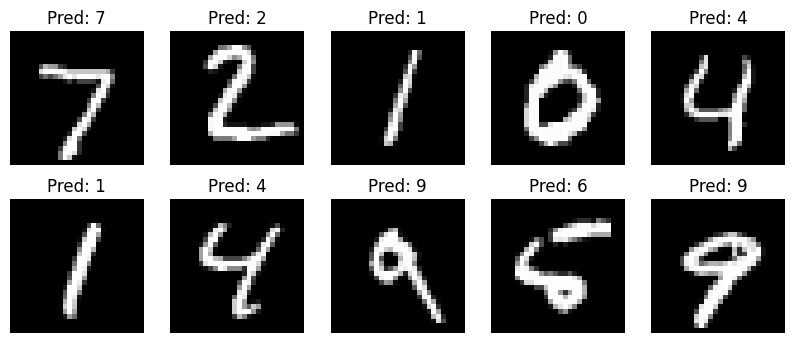

In [14]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(test_pred[i])}")
    plt.axis('off')

plt.show()
